Contexto:

Você sabe o que é um c hargeback ? Você pode aprender mais sobre em:
https://www.equals.com.br/chargeback-como-evitar/
Como anexo a este documento, enviamos um conjunto de transações realizadas por um de
nossos clientes de e-commerce que possui um alto índice de c hargebacks . Na Aba 1, você
encontra a data e hora de cada transação, o valor da transação, o número do cartão de origem
e um indicador se ela sofreu ou não chargeback . Na Aba 2, temos dados similares, porém sem
o indicador de chargeback .

Perguntas:

(1) Qual é o comportamento transacional do cliente?
(2) Qual o perfil das transações que retornaram chargeback?
(3) Quais transações na Aba 2 potencialmente sofrerão chargeback? Qual método você usou
para chegar nessa conclusão?
(4) Se você pudesse propor regras para melhorar a operação deste cliente, o que você
proporia? Explique para a gente qual o impacto (numérico) das regras propostas.

In [137]:
#importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from pandasql import sqldf

In [138]:
pysqldf = lambda q: sqldf(q, globals())

In [139]:
df1 = pd.read_excel('Dados - Desafio Stone.xlsx', sheet_name='Aba 1')

In [140]:
#Criação de uma coluna com o valor do dia da semana, sendo 0 igual a segunda-feira, e 6, domingo.

df1['Dia da Semana'] = df1['Dia'].dt.dayofweek

In [141]:
df1

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana
0,2015-05-01,00:01:54,36.54,536518******2108,Não,4
1,2015-05-01,00:03:46,36.54,536518******2108,Não,4
2,2015-05-01,00:08:50,69.00,453211******1239,Não,4
3,2015-05-01,00:27:00,193.43,548827******1705,Não,4
4,2015-05-01,01:32:46,132.00,531681******9778,Não,4
5,2015-05-01,02:10:26,161.00,515117******4107,Não,4
6,2015-05-01,08:09:15,110.00,432032******9111,Não,4
7,2015-05-01,08:30:16,159.50,544540******7141,Não,4
8,2015-05-01,09:13:51,126.50,554906******0358,Sim,4
9,2015-05-01,09:15:28,126.50,554906******0358,Sim,4


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11128 entries, 0 to 11127
Data columns (total 6 columns):
Dia              11128 non-null datetime64[ns]
Hora             11128 non-null object
Valor            11128 non-null float64
Cartão           11128 non-null object
CBK              11128 non-null object
Dia da Semana    11128 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 521.7+ KB


# Rascunho do SQL

In [143]:
#Aplica uma transformação para juntar as duas colunas de data e hora em uma coluna única, do tipo Timestamp

#df1['Time'] = df1['Hora'].apply(str)
#df1['Day'] = df1['Dia'].apply(str)
df1['Data_Completa'] = pd.to_datetime(df1['Dia'].apply(str) + ' ' + df1['Hora'].apply(str))

In [144]:
#verificação do tipo do valor da primeira linha da coluna 'Data_Completa'
type(df1.loc[0, 'Data_Completa'])

pandas._libs.tslibs.timestamps.Timestamp

In [145]:
df1['Data_Completa'].dt.time

0        00:01:54
1        00:03:46
2        00:08:50
3        00:27:00
4        01:32:46
5        02:10:26
6        08:09:15
7        08:30:16
8        09:13:51
9        09:15:28
10       09:16:52
11       09:21:35
12       09:23:02
13       09:24:24
14       09:25:47
15       09:26:56
16       09:28:27
17       09:29:39
18       09:30:52
19       09:39:05
20       09:48:03
21       09:56:32
22       10:46:50
23       11:02:19
24       11:06:34
25       11:07:01
26       11:08:58
27       11:14:13
28       11:15:57
29       11:41:42
           ...   
11098    20:34:07
11099    20:38:01
11100    20:38:26
11101    20:43:38
11102    20:46:00
11103    21:07:56
11104    21:18:01
11105    21:28:06
11106    21:30:34
11107    21:37:43
11108    21:50:59
11109    21:51:31
11110    21:57:00
11111    22:09:08
11112    22:14:04
11113    22:15:48
11114    22:17:09
11115    22:19:07
11116    22:20:09
11117    22:35:38
11118    22:38:19
11119    22:50:27
11120    22:55:35
11121    23:01:12
11122    2

In [146]:
df1

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana,Data_Completa
0,2015-05-01,00:01:54,36.54,536518******2108,Não,4,2015-05-01 00:01:54
1,2015-05-01,00:03:46,36.54,536518******2108,Não,4,2015-05-01 00:03:46
2,2015-05-01,00:08:50,69.00,453211******1239,Não,4,2015-05-01 00:08:50
3,2015-05-01,00:27:00,193.43,548827******1705,Não,4,2015-05-01 00:27:00
4,2015-05-01,01:32:46,132.00,531681******9778,Não,4,2015-05-01 01:32:46
5,2015-05-01,02:10:26,161.00,515117******4107,Não,4,2015-05-01 02:10:26
6,2015-05-01,08:09:15,110.00,432032******9111,Não,4,2015-05-01 08:09:15
7,2015-05-01,08:30:16,159.50,544540******7141,Não,4,2015-05-01 08:30:16
8,2015-05-01,09:13:51,126.50,554906******0358,Sim,4,2015-05-01 09:13:51
9,2015-05-01,09:15:28,126.50,554906******0358,Sim,4,2015-05-01 09:15:28


In [12]:
sqldf("select sqlite_version()")

,sqlite_version()
0,3.34.0


In [10]:
#### Exemplo do papel de pão por cartão


q = """
    SELECT Cartão, data_completa, valor,
    ROW_NUMBER() OVER (PARTITION BY Cartão ORDER BY Data_Completa rows between unbounded preceding and current row) - 1 as numero_da_transacao_ate_a_vigente
    FROM df1
    
    """

pysqldf(q)

,Cartão,Data_Completa,Valor,numero_da_transacao_ate_a_vigente
0,400217******1137,2015-05-06 09:37:46.000000,198.00,0
1,400217******1353,2015-05-27 23:37:20.000000,172.50,0
2,400217******1353,2015-05-27 23:38:58.000000,172.50,1
3,400217******1353,2015-05-27 23:40:15.000000,172.50,2
4,400217******1353,2015-05-27 23:41:38.000000,172.50,3
5,400217******1353,2015-05-27 23:43:12.000000,172.50,4
6,400217******1353,2015-05-27 23:44:52.000000,172.50,5
7,400217******1353,2015-05-27 23:46:15.000000,172.50,6
8,400217******1353,2015-05-27 23:47:29.000000,172.50,7
9,400217******1637,2015-05-16 09:14:05.000000,715.00,0


In [24]:
#### Exemplo do papel de pão por cartão e hora


q = """

    SELECT Cartão, Dia, Hora,
    ROW_NUMBER() OVER (PARTITION BY Cartão, Dia, Hora ORDER BY Data_Completa rows between unbounded preceding and current row) - 1 as numero_da_transacao
    FROM df1
    
    """

pysqldf(q)

,Cartão,Dia,Hora,numero_da_transacao
0,400217******1137,2015-05-06 00:00:00.000000,09:37:46.000000,0
1,400217******1353,2015-05-27 00:00:00.000000,23:37:20.000000,0
2,400217******1353,2015-05-27 00:00:00.000000,23:38:58.000000,0
3,400217******1353,2015-05-27 00:00:00.000000,23:40:15.000000,0
4,400217******1353,2015-05-27 00:00:00.000000,23:41:38.000000,0
5,400217******1353,2015-05-27 00:00:00.000000,23:43:12.000000,0
6,400217******1353,2015-05-27 00:00:00.000000,23:44:52.000000,0
7,400217******1353,2015-05-27 00:00:00.000000,23:46:15.000000,0
8,400217******1353,2015-05-27 00:00:00.000000,23:47:29.000000,0
9,400217******1637,2015-05-16 00:00:00.000000,09:14:05.000000,0


In [25]:
## análise do numero de transações (existem transações que ocorrem no mesmo dia e horário)

q = """
    WITH numero_transacoes as(
    SELECT Cartão, Dia, Hora,
    ROW_NUMBER() OVER (PARTITION BY Cartão, Dia, Hora ORDER BY Data_Completa rows between unbounded preceding and current row) - 1 as numero_da_transacao
    FROM df1)
    SELECT Cartão, Dia, Hora, numero_da_transacao
    FROM numero_transacoes
    WHERE numero_da_transacao > 0
    
    """

pysqldf(q)

,Cartão,Dia,Hora,numero_da_transacao
0,400217******5510,2015-05-30 00:00:00.000000,15:25:05.000000,1
1,400248******9368,2015-05-30 00:00:00.000000,15:39:51.000000,1
2,400770******1995,2015-05-30 00:00:00.000000,22:50:27.000000,1
3,401370******9822,2015-05-30 00:00:00.000000,14:41:22.000000,1
4,401370******9822,2015-05-30 00:00:00.000000,14:42:40.000000,1
5,403225******6696,2015-05-30 00:00:00.000000,22:19:07.000000,1
6,403254******3645,2015-05-30 00:00:00.000000,14:56:05.000000,1
7,409308******5021,2015-05-30 00:00:00.000000,14:49:35.000000,1
8,409308******8968,2015-05-30 00:00:00.000000,16:44:37.000000,1
9,409600******0720,2015-05-30 00:00:00.000000,14:57:11.000000,1


In [33]:
q = """
    SELECT Data_Completa, Count(*)
    FROM df1
    GROUP BY Dia
    
    """

pysqldf(q)

,Data_Completa,Count(*)
0,2015-05-01 00:01:54.000000,170
1,2015-05-02 00:01:26.000000,106
2,2015-05-03 00:52:24.000000,127
3,2015-05-04 00:01:58.000000,263
4,2015-05-05 00:03:25.000000,318
5,2015-05-06 00:06:40.000000,552
6,2015-05-07 00:10:18.000000,505
7,2015-05-08 00:03:53.000000,512
8,2015-05-09 00:06:10.000000,311
9,2015-05-10 00:01:41.000000,174


In [30]:
q = """
    SELECT Cartão, Data_Completa,
       
    SUM(Valor) OVER (PARTITION BY Cartão ORDER BY Data_Completa) AS valor_total
    FROM df1
    
    """

pysqldf(q)

,Cartão,Data_Completa,valor_total
0,400217******1137,2015-05-06 09:37:46.000000,198.00
1,400217******1353,2015-05-27 23:37:20.000000,172.50
2,400217******1353,2015-05-27 23:38:58.000000,345.00
3,400217******1353,2015-05-27 23:40:15.000000,517.50
4,400217******1353,2015-05-27 23:41:38.000000,690.00
5,400217******1353,2015-05-27 23:43:12.000000,862.50
6,400217******1353,2015-05-27 23:44:52.000000,1035.00
7,400217******1353,2015-05-27 23:46:15.000000,1207.50
8,400217******1353,2015-05-27 23:47:29.000000,1380.00
9,400217******1637,2015-05-16 09:14:05.000000,715.00


In [46]:
q = """
    SELECT Cartão, Count(*)
   
    FROM df1
    GROUP BY Cartão 
    ORDER BY Count(*) DESC
    
    """

pysqldf(q)

,Cartão,Count(*)
0,552289******7788,20
1,521397******2711,20
2,544828******8377,15
3,498407******2077,12
4,400217******7228,12
5,546452******5160,10
6,498408******0601,10
7,403246******0294,9
8,549317******3024,8
9,544817******1250,8


In [51]:
df1[df1['Cartão']=='552289******7788']

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana,Data_Completa
6449,2015-05-17,16:08:10,250.0,552289******7788,Sim,6,2015-05-17 16:08:10
6451,2015-05-17,16:09:23,250.0,552289******7788,Sim,6,2015-05-17 16:09:23
6453,2015-05-17,16:10:38,250.0,552289******7788,Sim,6,2015-05-17 16:10:38
6454,2015-05-17,16:11:57,250.0,552289******7788,Sim,6,2015-05-17 16:11:57
6455,2015-05-17,16:13:19,250.0,552289******7788,Sim,6,2015-05-17 16:13:19
6456,2015-05-17,16:14:34,250.0,552289******7788,Sim,6,2015-05-17 16:14:34
6457,2015-05-17,16:16:24,250.0,552289******7788,Sim,6,2015-05-17 16:16:24
6458,2015-05-17,16:17:58,250.0,552289******7788,Sim,6,2015-05-17 16:17:58
6459,2015-05-17,16:19:34,250.0,552289******7788,Sim,6,2015-05-17 16:19:34
6461,2015-05-17,16:21:47,250.0,552289******7788,Sim,6,2015-05-17 16:21:47


In [55]:
df1[df1['Cartão']=='521397******2711']

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana,Data_Completa
10382,2015-05-29,15:52:08,46.0,521397******2711,Sim,4,2015-05-29 15:52:08
10384,2015-05-29,15:53:06,46.0,521397******2711,Sim,4,2015-05-29 15:53:06
10385,2015-05-29,15:54:07,46.0,521397******2711,Sim,4,2015-05-29 15:54:07
10387,2015-05-29,15:55:17,46.0,521397******2711,Sim,4,2015-05-29 15:55:17
10390,2015-05-29,15:57:33,172.5,521397******2711,Sim,4,2015-05-29 15:57:33
10391,2015-05-29,15:58:26,172.5,521397******2711,Sim,4,2015-05-29 15:58:26
10394,2015-05-29,16:00:00,172.5,521397******2711,Sim,4,2015-05-29 16:00:00
10397,2015-05-29,16:01:46,190.4,521397******2711,Sim,4,2015-05-29 16:01:46
10399,2015-05-29,16:02:49,190.4,521397******2711,Sim,4,2015-05-29 16:02:49
10401,2015-05-29,16:04:21,190.4,521397******2711,Sim,4,2015-05-29 16:04:21


In [54]:
df1[df1['Cartão']=='544828******8377']

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana,Data_Completa
8234,2015-05-23,15:24:17,95.2,544828******8377,Sim,5,2015-05-23 15:24:17
8236,2015-05-23,15:26:16,95.2,544828******8377,Sim,5,2015-05-23 15:26:16
8237,2015-05-23,15:28:01,95.2,544828******8377,Sim,5,2015-05-23 15:28:01
8239,2015-05-23,15:29:42,95.2,544828******8377,Sim,5,2015-05-23 15:29:42
8242,2015-05-23,15:31:26,95.2,544828******8377,Sim,5,2015-05-23 15:31:26
8244,2015-05-23,15:32:51,95.2,544828******8377,Sim,5,2015-05-23 15:32:51
8246,2015-05-23,15:34:10,95.2,544828******8377,Sim,5,2015-05-23 15:34:10
8730,2015-05-25,16:07:46,134.4,544828******8377,Sim,0,2015-05-25 16:07:46
8732,2015-05-25,16:09:13,134.4,544828******8377,Sim,0,2015-05-25 16:09:13
8733,2015-05-25,16:10:48,134.4,544828******8377,Sim,0,2015-05-25 16:10:48


In [53]:
df1[df1['Cartão']=='498407******2077']

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana,Data_Completa
3864,2015-05-11,23:38:07,201.25,498407******2077,Sim,0,2015-05-11 23:38:07
3866,2015-05-11,23:39:27,304.75,498407******2077,Sim,0,2015-05-11 23:39:27
3868,2015-05-11,23:40:43,304.75,498407******2077,Sim,0,2015-05-11 23:40:43
3870,2015-05-11,23:44:43,440.00,498407******2077,Sim,0,2015-05-11 23:44:43
3872,2015-05-11,23:45:56,440.00,498407******2077,Sim,0,2015-05-11 23:45:56
3873,2015-05-11,23:47:15,440.00,498407******2077,Sim,0,2015-05-11 23:47:15
8260,2015-05-23,16:12:58,117.60,498407******2077,Sim,5,2015-05-23 16:12:58
8262,2015-05-23,16:22:49,117.60,498407******2077,Sim,5,2015-05-23 16:22:49
9755,2015-05-28,17:56:18,172.50,498407******2077,Sim,3,2015-05-28 17:56:18
9758,2015-05-28,17:57:40,172.50,498407******2077,Sim,3,2015-05-28 17:57:40


In [52]:
df1[df1['Cartão']=='400217******7228']

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana,Data_Completa
3409,2015-05-11,16:07:24,55.0,400217******7228,Sim,0,2015-05-11 16:07:24
3411,2015-05-11,16:10:53,55.0,400217******7228,Sim,0,2015-05-11 16:10:53
3412,2015-05-11,16:12:03,110.0,400217******7228,Sim,0,2015-05-11 16:12:03
3414,2015-05-11,16:13:17,55.0,400217******7228,Sim,0,2015-05-11 16:13:17
3418,2015-05-11,16:17:02,220.0,400217******7228,Sim,0,2015-05-11 16:17:02
3421,2015-05-11,16:18:28,220.0,400217******7228,Sim,0,2015-05-11 16:18:28
3425,2015-05-11,16:23:42,110.0,400217******7228,Sim,0,2015-05-11 16:23:42
3426,2015-05-11,16:25:25,220.0,400217******7228,Sim,0,2015-05-11 16:25:25
3433,2015-05-11,16:30:20,165.0,400217******7228,Sim,0,2015-05-11 16:30:20
3435,2015-05-11,16:31:18,110.0,400217******7228,Sim,0,2015-05-11 16:31:18


In [40]:
q = """

    SELECT Cartão, 
    SUM(Valor) AS total_cartão
    FROM df1
    GROUP BY Cartão
    ORDER BY total_cartão DESC
    
    """

pysqldf(q)

,Cartão,total_cartão
0,552289******7788,5000.00
1,514911******5714,4664.00
2,498407******2077,3055.95
3,422061******5926,2920.00
4,498442******7796,2840.20
5,453211******8940,2760.00
6,552128******7181,2688.00
7,552289******3550,2538.24
8,521397******2711,2453.10
9,514868******9444,2419.20


# Fim do Rascunho SQL

In [8]:
#criação de uma nova coluna 'DataTime', no formato datetime. Em seguida, setada como índice do dataframe

df1['DateTime'] = pd.to_datetime(df1['Hora'].astype(str))
df1.set_index('DateTime',inplace=True)

In [9]:
#Filtragem das linhas que tiveram Chargeback

chargeback = df1[df1['CBK']=='Sim']

In [10]:
df1['Valor'].describe()

count    11128.000000
mean       129.550076
std        141.420554
min          1.000000
25%         55.000000
50%         99.000000
75%        154.000000
max       2920.000000
Name: Valor, dtype: float64

In [10]:
chargeback['Valor'].describe()

count     572.000000
mean      183.300455
std       165.331552
min        13.990000
25%        69.000000
50%       132.000000
75%       209.250000
max      1012.000000
Name: Valor, dtype: float64

In [11]:
#Filtragem das linhas que não tiveram chargeback

nao_chargeback = df1[df1['CBK']=='Não']

In [12]:
nao_chargeback['Valor'].describe()

count    10556.000000
mean       126.637494
std        139.426771
min          1.000000
25%         55.000000
50%         99.000000
75%        154.000000
max       2920.000000
Name: Valor, dtype: float64

In [13]:
#Agrupamento das linhas de chargeback por hora (frequência de 1 hora)

chargeback.resample('H').count()

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana
DateTime,,,,,,
2021-01-14 00:00:00,16,16,16,16,16,16
2021-01-14 01:00:00,11,11,11,11,11,11
2021-01-14 02:00:00,8,8,8,8,8,8
2021-01-14 03:00:00,6,6,6,6,6,6
2021-01-14 04:00:00,0,0,0,0,0,0
2021-01-14 05:00:00,1,1,1,1,1,1
2021-01-14 06:00:00,10,10,10,10,10,10
2021-01-14 07:00:00,0,0,0,0,0,0
2021-01-14 08:00:00,0,0,0,0,0,0


In [14]:
hora_chargeback = chargeback['Dia'].resample('H').count()
hora_chargeback

DateTime
2021-01-14 00:00:00    16
2021-01-14 01:00:00    11
2021-01-14 02:00:00     8
2021-01-14 03:00:00     6
2021-01-14 04:00:00     0
2021-01-14 05:00:00     1
2021-01-14 06:00:00    10
2021-01-14 07:00:00     0
2021-01-14 08:00:00     0
2021-01-14 09:00:00    15
2021-01-14 10:00:00     7
2021-01-14 11:00:00    28
2021-01-14 12:00:00    33
2021-01-14 13:00:00    32
2021-01-14 14:00:00    29
2021-01-14 15:00:00    69
2021-01-14 16:00:00    98
2021-01-14 17:00:00    42
2021-01-14 18:00:00    22
2021-01-14 19:00:00    37
2021-01-14 20:00:00    18
2021-01-14 21:00:00    21
2021-01-14 22:00:00    31
2021-01-14 23:00:00    38
Freq: H, Name: Dia, dtype: int64

In [16]:
#Divisão das linhas de não chargeback por hora (frequência de 1 hora)

hora_nao_chargeback = nao_chargeback['Dia'].resample('H').count()
hora_nao_chargeback

DateTime
2021-01-14 00:00:00    247
2021-01-14 01:00:00    117
2021-01-14 02:00:00     42
2021-01-14 03:00:00     20
2021-01-14 04:00:00     10
2021-01-14 05:00:00      4
2021-01-14 06:00:00     20
2021-01-14 07:00:00     79
2021-01-14 08:00:00    203
2021-01-14 09:00:00    364
2021-01-14 10:00:00    582
2021-01-14 11:00:00    606
2021-01-14 12:00:00    616
2021-01-14 13:00:00    731
2021-01-14 14:00:00    736
2021-01-14 15:00:00    708
2021-01-14 16:00:00    640
2021-01-14 17:00:00    718
2021-01-14 18:00:00    779
2021-01-14 19:00:00    796
2021-01-14 20:00:00    670
2021-01-14 21:00:00    695
2021-01-14 22:00:00    689
2021-01-14 23:00:00    484
Freq: H, Name: Dia, dtype: int64

In [17]:
#Agrupamento do número de chargebacks por dia da semana

chargeback.groupby('Dia da Semana')['Dia'].count()

Dia da Semana
0     74
1     69
2     71
3     99
4    130
5    102
6     27
Name: Dia, dtype: int64

In [18]:
#Agrupamento do valor médio de chargebacks por dia da semana

chargeback.groupby('Dia da Semana').mean()

,Valor
Dia da Semana,
0,175.826486
1,155.674203
2,265.130563
3,140.800909
4,142.770385
5,230.269314
6,232.740741


In [19]:
#Agrupamento do número de não chargebacks por dia da semana

nao_chargeback.groupby('Dia da Semana')['Dia'].count()

Dia da Semana
0    1603
1    1409
2    1557
3    1891
4    2310
5    1211
6     575
Name: Dia, dtype: int64

In [20]:
#Agrupamento do valor médio de não chargebacks por dia da semana

nao_chargeback.groupby('Dia da Semana').mean()

,Valor
Dia da Semana,
0,163.604541
1,119.945224
2,122.707585
3,122.360851
4,125.203030
5,107.686515
6,110.360070


# Plotagem dos Dados

C:\Users\adria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


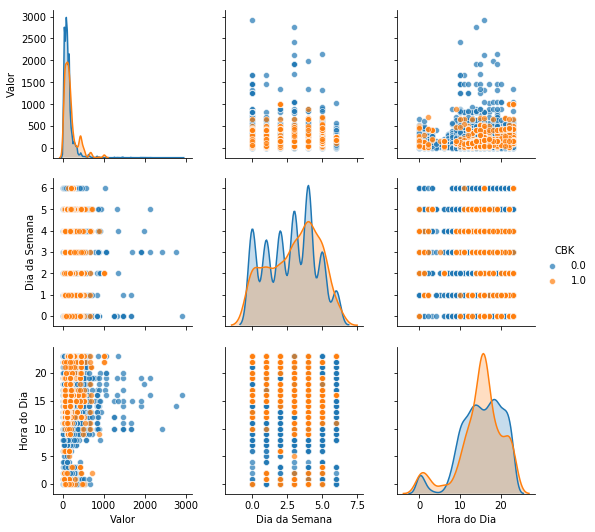

In [40]:
#Tem que criar o df antes. Ele foi criado lá embaixo só.

sns.pairplot(df, hue='CBK', vars=['Valor', 'Dia da Semana', 'Hora do Dia'], kind='scatter', plot_kws={'alpha':0.7},  hue_order = [0.0, 1.0])

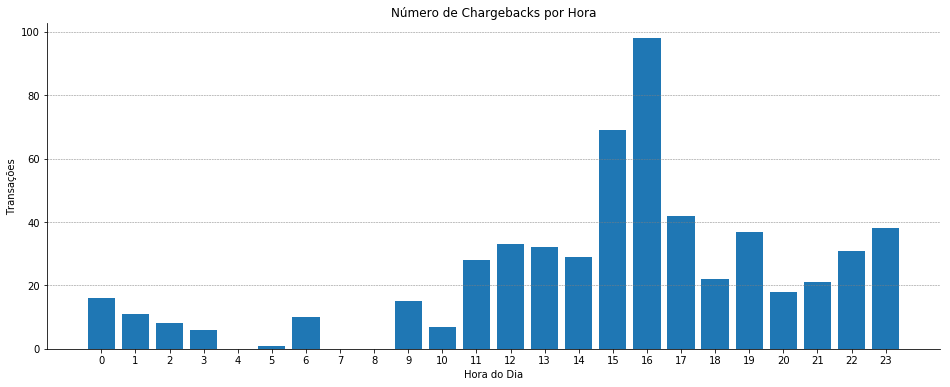

In [115]:
y = hora_chargeback
x = [x for x in range(24)]
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Número de Chargebacks por Hora", xlabel = "Hora do Dia")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Transações')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

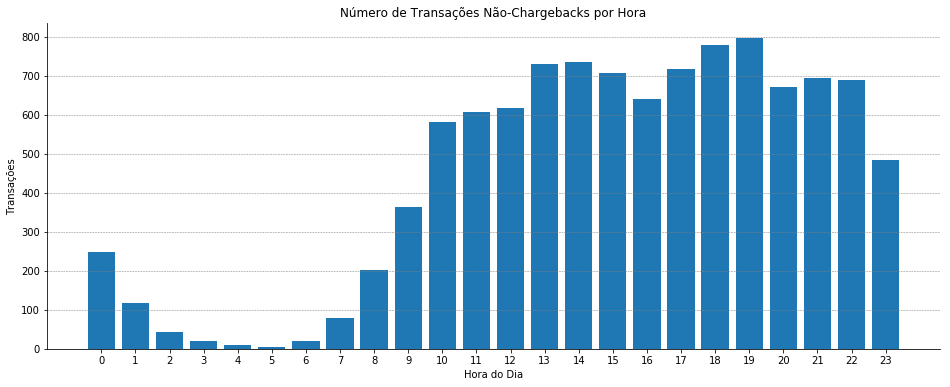

In [112]:
y = hora_nao_chargeback
x = [x for x in range(24)]
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Número de Transações Não-Chargebacks por Hora", xlabel = "Hora do Dia")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Transações')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

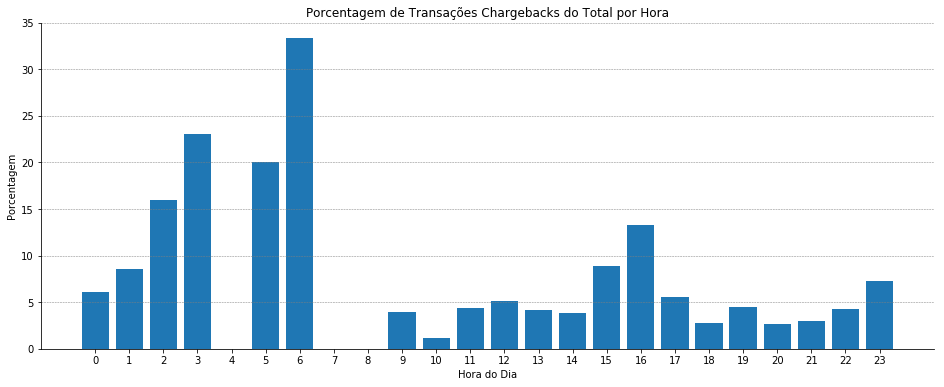

In [117]:
y = hora_chargeback/(hora_chargeback + hora_nao_chargeback)*100
x = [x for x in range(24)]
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Transações Chargebacks do Total por Hora", xlabel = "Hora do Dia")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

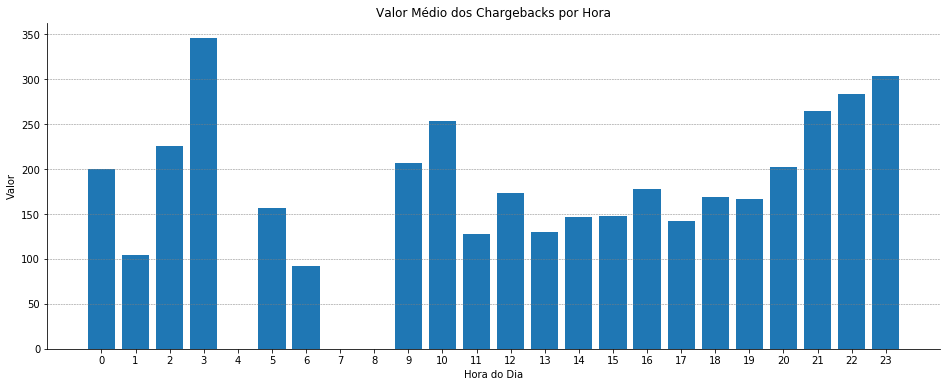

In [118]:
y = chargeback['Valor'].resample('H').mean()
x = [x for x in range(24)]
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Valor Médio dos Chargebacks por Hora", xlabel = "Hora do Dia")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Valor')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

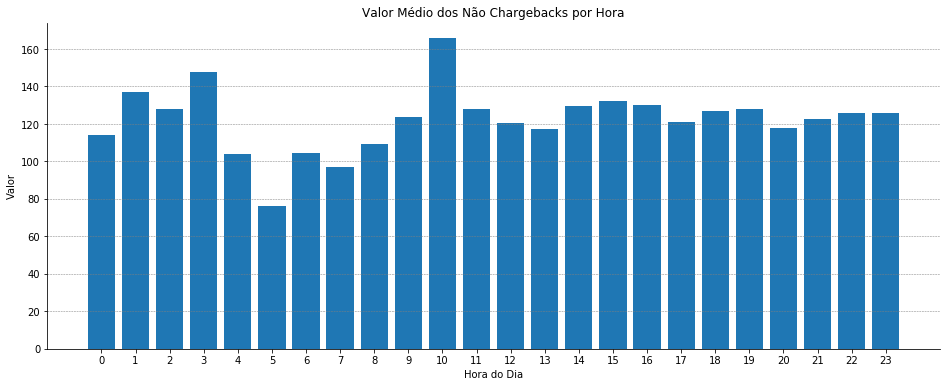

In [119]:
y = nao_chargeback['Valor'].resample('H').mean()
x = [x for x in range(24)]
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Valor Médio dos Não Chargebacks por Hora", xlabel = "Hora do Dia")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Valor')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

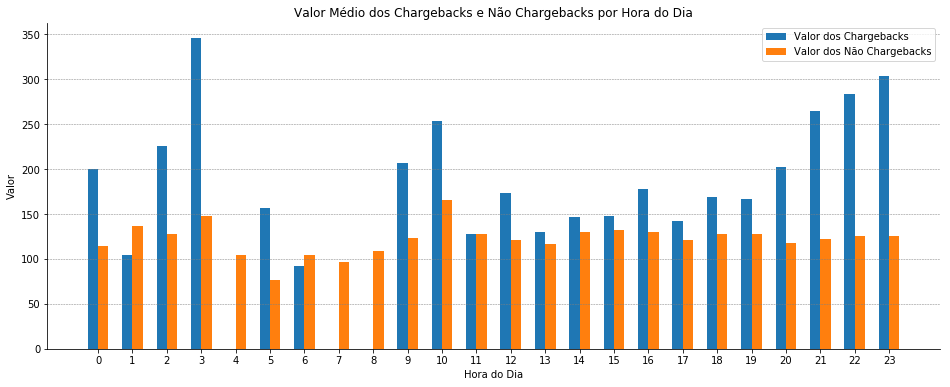

In [120]:
# Numbers of pairs of bars you want
N = 24

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = chargeback['Valor'].resample('H').mean()
# Specify the values of orange bars (height)
orange_bar = nao_chargeback['Valor'].resample('H').mean()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize =(16, 6)) 

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Valor dos Chargebacks')
plt.bar(ind + width, orange_bar, width, label='Valor dos Não Chargebacks')

plt.xlabel('Hora do Dia')
#plt.ylabel('Valor Médio')
plt.title('Valor Médio dos Chargebacks e Não Chargebacks por Hora do Dia')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
x = [x for x in range(24)]
plt.xticks(ind + width / 2, x)

# Finding the best position for legends and putting it
plt.legend(loc='best')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Valor')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

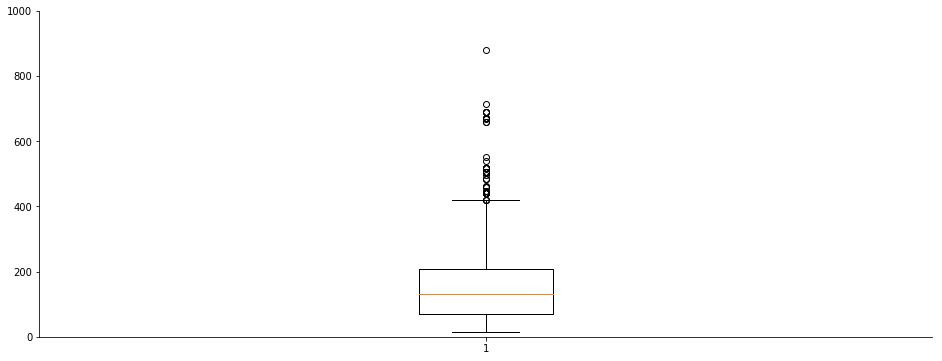

In [92]:
fig, ax = plt.subplots(figsize =(16, 6)) 
plt.ylim(0, 1000)
plt.boxplot(chargeback['Valor'], whis=1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

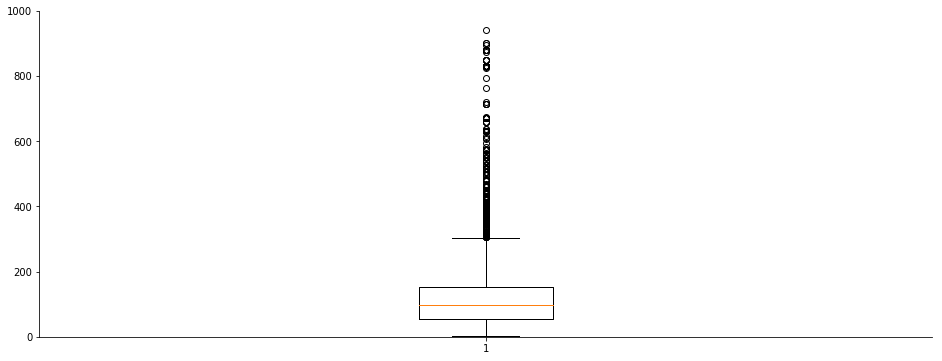

In [91]:
fig, ax = plt.subplots(figsize =(16, 6)) 
plt.ylim(0, 1000)
plt.boxplot(nao_chargeback['Valor'], whis=1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

C:\Users\adria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


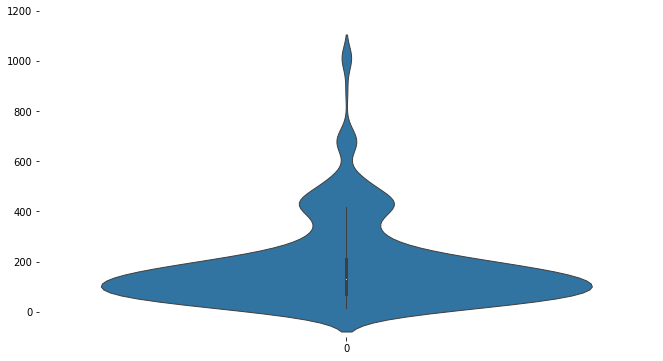

In [64]:
#sns.violinplot(data=chargeback['Valor'])

f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=chargeback['Valor'], linewidth=1)
ax.set(ylim=(-100, 1200))
sns.despine(left=True, bottom=True)

C:\Users\adria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


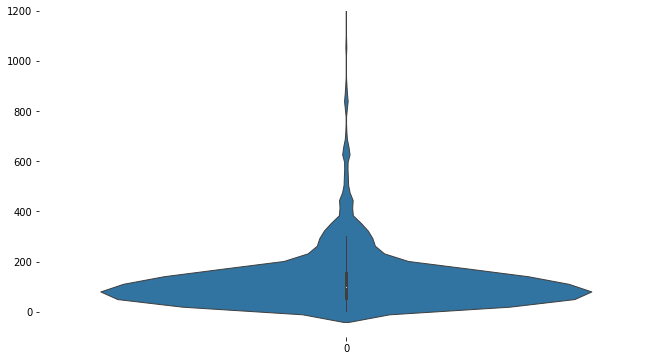

In [79]:
#sns.violinplot( data=nao_chargeback['Valor'])

f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=nao_chargeback['Valor'], linewidth=1)
ax.set(ylim=(-100, 1200))
sns.despine(left=True, bottom=True)

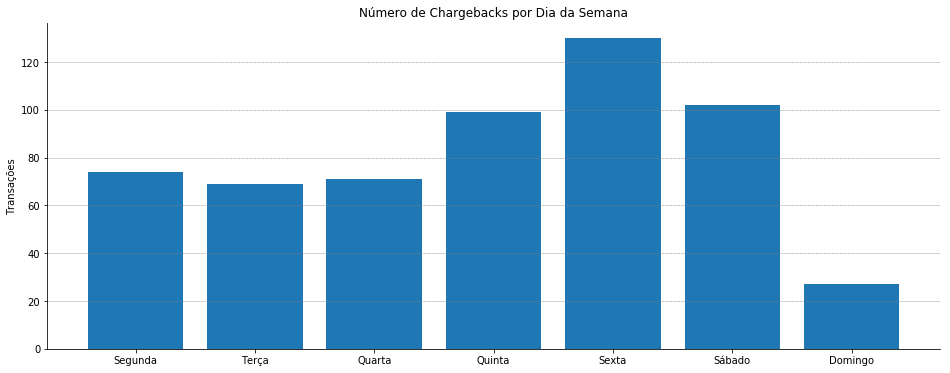

In [121]:
y = chargeback.groupby('Dia da Semana')['Dia'].count()
x = [x for x in range(7)]
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x, y, tick_label = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])

ax.set(title = "Número de Chargebacks por Dia da Semana")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Transações')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

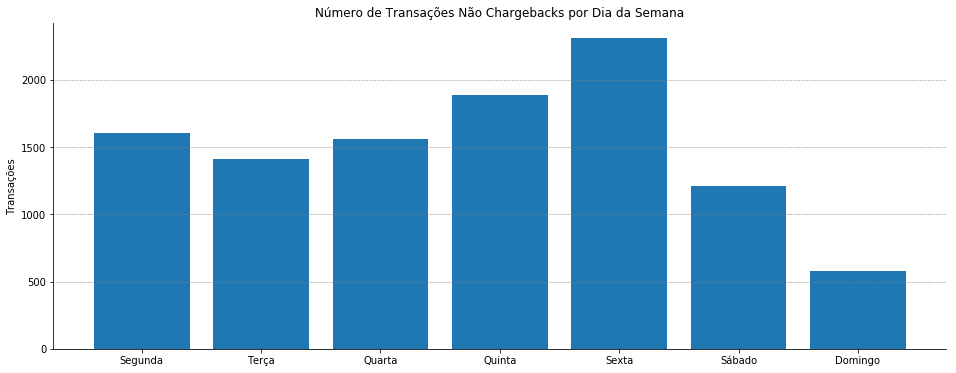

In [122]:
y = nao_chargeback.groupby('Dia da Semana')['Dia'].count()
x = [x for x in range(7)]
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x, y, tick_label = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])

ax.set(title = "Número de Transações Não Chargebacks por Dia da Semana")
#plt.box(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.ylabel('Transações')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

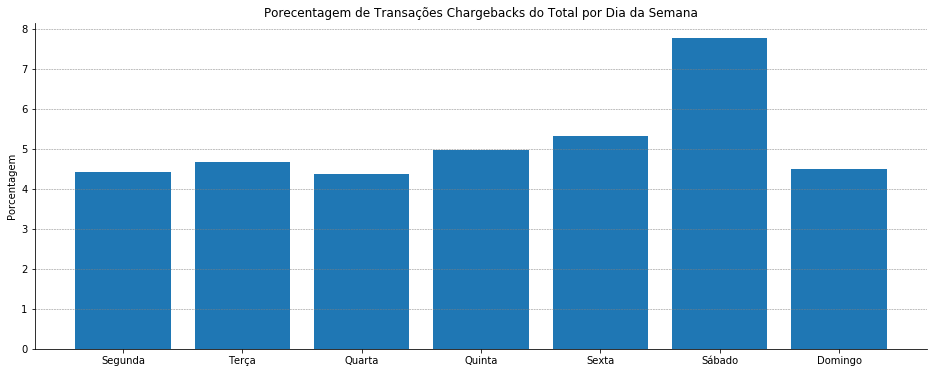

In [123]:
y = chargeback.groupby('Dia da Semana')['Dia'].count()/(chargeback.groupby('Dia da Semana')['Dia'].count() + nao_chargeback.groupby('Dia da Semana')['Dia'].count())*100
x = [x for x in range(7)]
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x, y, tick_label = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])

ax.set(title = "Porecentagem de Transações Chargebacks do Total por Dia da Semana")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

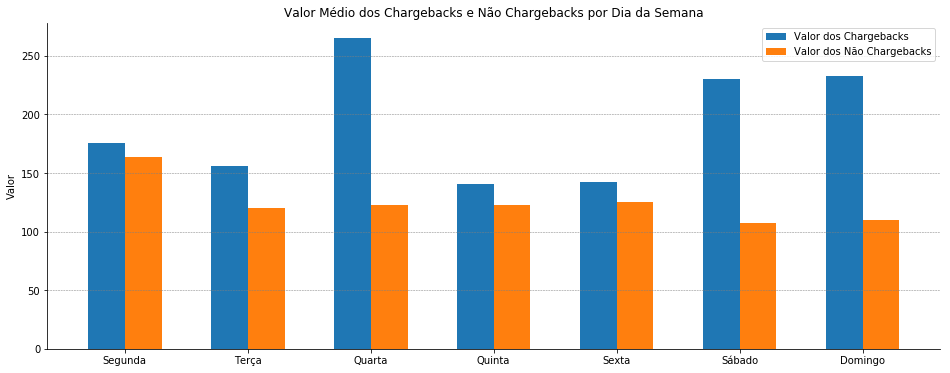

In [124]:
# Numbers of pairs of bars you want
N = 7

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = chargeback.groupby('Dia da Semana')['Valor'].mean()
# Specify the values of orange bars (height)
orange_bar = nao_chargeback.groupby('Dia da Semana')['Valor'].mean()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(16, 6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Valor dos Chargebacks')
plt.bar(ind + width, orange_bar, width, label='Valor dos Não Chargebacks')

#plt.xlabel('Dia da Semana')
#plt.ylabel('Valor Médio')
plt.title('Valor Médio dos Chargebacks e Não Chargebacks por Dia da Semana')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
x = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
plt.xticks(ind + width / 2, x)

# Finding the best position for legends and putting it
plt.legend(loc='best')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Valor')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

As transações do tipo chargeback apresentam comportamentos distintos das outras transações.

Em termos de hora do dia, as transações do tipo chargeback ocorrem mais acentuamente no horário das 15 às 17 horas. 

Em relação aos valores das transações, o valor médio das transações chargeback são maiores que as transações normais. Em especial, transações de chargeback muito tarde da noite e de madrugada possuem valores mais altos (como às 3 da manhã). 

Finalmente, para o dia da semana não é possível identificar um dia com um grande volume para se diferenciar os dois tipos de transações. Sexta-feira é o dia de maior volume de transações chargebacks ou não. No entanto, ao se analisar o valor médio das transações, quarta-feira, sábado e domingo apresentam um alto valor médio de transações do tipo chargeback.

# Parte 2 - Machine Learning

In [58]:
#leitura da aba 2, relativo aos dados sem informação de chargebacks

df2 = pd.read_excel('Dados - Desafio Stone.xlsx', sheet_name='Aba 2')

In [59]:
#Criação de uma coluna com o valor do dia da semana, sendo 0 igual a segunda-feira, e 6, domingo.

df2['Dia da Semana'] = df2['Dia'].dt.dayofweek

In [60]:
df2

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana
0,2015-06-01,00:02:25,112.00,541555******5965,NaN,0
1,2015-06-01,00:30:45,112.00,406669******7350,NaN,0
2,2015-06-01,00:43:20,18.34,541187******4535,NaN,0
3,2015-06-01,00:46:46,55.00,554927******5629,NaN,0
4,2015-06-01,00:47:50,50.00,498407******2077,NaN,0
5,2015-06-01,00:48:51,50.00,498407******2077,NaN,0
6,2015-06-01,00:49:55,50.00,498407******2077,NaN,0
7,2015-06-01,00:51:08,50.00,498407******2077,NaN,0
8,2015-06-01,00:53:28,201.60,498407******2077,NaN,0
9,2015-06-01,00:54:39,201.60,498407******2077,NaN,0


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11820 entries, 0 to 11819
Data columns (total 6 columns):
Dia              11820 non-null datetime64[ns]
Hora             11820 non-null object
Valor            11820 non-null float64
Cartão           11820 non-null object
CBK              0 non-null float64
Dia da Semana    11820 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 554.1+ KB


In [31]:
#leitura novamente da aba 1, para o uso dos dados de teste e treino na criação do modelo de aprendizagem de máquina
df = pd.read_excel('Dados - Desafio Stone.xlsx', sheet_name='Aba 1')
#Criação de uma coluna com o valor do dia da semana, sendo 0 igual a segunda-feira, e 6, domingo.
df['Dia da Semana'] = df['Dia'].dt.dayofweek

In [32]:
df

,Dia,Hora,Valor,Cartão,CBK,Dia da Semana
0,2015-05-01,00:01:54,36.54,536518******2108,Não,4
1,2015-05-01,00:03:46,36.54,536518******2108,Não,4
2,2015-05-01,00:08:50,69.00,453211******1239,Não,4
3,2015-05-01,00:27:00,193.43,548827******1705,Não,4
4,2015-05-01,01:32:46,132.00,531681******9778,Não,4
5,2015-05-01,02:10:26,161.00,515117******4107,Não,4
6,2015-05-01,08:09:15,110.00,432032******9111,Não,4
7,2015-05-01,08:30:16,159.50,544540******7141,Não,4
8,2015-05-01,09:13:51,126.50,554906******0358,Sim,4
9,2015-05-01,09:15:28,126.50,554906******0358,Sim,4


In [33]:
#criação de dummies na coluna de 'CBK', para utilizar dados numéricos no lugar de dados categóricos. Quando 0, não houve chargeback; caso 1, houve chargeback.
df['CBK'] = pd.get_dummies(df['CBK'], drop_first=True)
#retirada das colunas 'Dia' e 'Cartão', já que não influenciam para identificar uma transação de chargeback
df.drop(['Dia', 'Cartão'], axis=1, inplace=True)

In [34]:
df

,Hora,Valor,CBK,Dia da Semana
0,00:01:54,36.54,0,4
1,00:03:46,36.54,0,4
2,00:08:50,69.00,0,4
3,00:27:00,193.43,0,4
4,01:32:46,132.00,0,4
5,02:10:26,161.00,0,4
6,08:09:15,110.00,0,4
7,08:30:16,159.50,0,4
8,09:13:51,126.50,1,4
9,09:15:28,126.50,1,4


In [35]:
#criação de um novo dataframe que agrupa os horários do dia em números (23:51:31 se torna 23, por exemplo). Desta forma, transforma os dados datetime.time em inteiros, permitindo a utilização nos modelos.

hora_dia = []

for i in range(len(df['Hora'])):
    hora_dia.append(df['Hora'][i].hour)
    
df_teste = pd.DataFrame(hora_dia, columns=['Hora do Dia'])

In [36]:
df_teste

,Hora do Dia
0,0
1,0
2,0
3,0
4,1
5,2
6,8
7,8
8,9
9,9


In [37]:
#junção dos dois dataframes, o original e o novo com as horas do dia.

df = pd.concat([df, df_teste], axis=1)

In [38]:
df

,Hora,Valor,CBK,Dia da Semana,Hora do Dia
0,00:01:54,36.54,0,4,0
1,00:03:46,36.54,0,4,0
2,00:08:50,69.00,0,4,0
3,00:27:00,193.43,0,4,0
4,01:32:46,132.00,0,4,1
5,02:10:26,161.00,0,4,2
6,08:09:15,110.00,0,4,8
7,08:30:16,159.50,0,4,8
8,09:13:51,126.50,1,4,9
9,09:15:28,126.50,1,4,9


In [39]:
#eliminação da coluna 'Hora'.

df.drop(['Hora'], axis=1, inplace=True)
df

,Valor,CBK,Dia da Semana,Hora do Dia
0,36.54,0,4,0
1,36.54,0,4,0
2,69.00,0,4,0
3,193.43,0,4,0
4,132.00,0,4,1
5,161.00,0,4,2
6,110.00,0,4,8
7,159.50,0,4,8
8,126.50,1,4,9
9,126.50,1,4,9


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('CBK', axis=1), df['CBK'], test_size=0.3)

In [74]:
logmodel = LogisticRegression()

In [75]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
predictions = logmodel.predict(x_test)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3178
          1       0.00      0.00      0.00       161

avg / total       0.91      0.95      0.93      3339



In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
print(confusion_matrix(y_test, predictions))

[[3176    2]
 [ 161    0]]


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\adria\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [83]:
dtree = DecisionTreeClassifier()

In [84]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
predTree = dtree.predict(x_test)

In [86]:
print(classification_report(y_test, predTree))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      3178
          1       0.54      0.49      0.52       161

avg / total       0.95      0.96      0.95      3339



In [87]:
print(confusion_matrix(y_test, predTree))

[[3112   66]
 [  82   79]]


In [105]:
rfc = RandomForestClassifier(n_estimators=200)

In [106]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [107]:
rfc_pred = rfc.predict(x_test)

In [108]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3178
          1       0.64      0.49      0.55       161

avg / total       0.96      0.96      0.96      3339



In [109]:
print(confusion_matrix(y_test, rfc_pred))

[[3133   45]
 [  82   79]]


In [110]:
from sklearn.svm import SVC

In [111]:
svc = SVC()

In [112]:
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
svc_pred = svc.predict(x_test)

In [114]:
print(classification_report(y_test, svc_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3178
          1       0.74      0.30      0.43       161

avg / total       0.96      0.96      0.95      3339



In [115]:
print(confusion_matrix(y_test, svc_pred))

[[3161   17]
 [ 112   49]]


In [116]:
df2.drop(['Dia', 'Cartão'], axis=1, inplace=True)
hora_dia = []

for i in range(len(df2['Hora'])):
    hora_dia.append(df2['Hora'][i].hour)
    
df_teste2 = pd.DataFrame(hora_dia, columns=['Hora do Dia'])
df2 = pd.concat([df2, df_teste2], axis=1)
df2.drop(['Hora'], axis=1, inplace=True)

In [117]:
df2

,Valor,CBK,Dia da Semana,Hora do Dia
0,112.00,NaN,0,0
1,112.00,NaN,0,0
2,18.34,NaN,0,0
3,55.00,NaN,0,0
4,50.00,NaN,0,0
5,50.00,NaN,0,0
6,50.00,NaN,0,0
7,50.00,NaN,0,0
8,201.60,NaN,0,0
9,201.60,NaN,0,0


In [119]:
#Avaliação de quantos casos positivos de chargeback o modelo SVM retorna

svc_pred = svc.predict(df2[['Valor','Dia da Semana','Hora do Dia']])

contagem =  0 
for i in range(len(svc_pred)):
    if svc_pred[i] == 1:
        contagem +=1
        
contagem

62

In [132]:
#Avaliação de quantos casos positivos de chargeback o modelo RandomForest retorna

contagem =  0 

rfc_pred = rfc.predict(df2[['Valor','Dia da Semana','Hora do Dia']])
contagem =  0 
for i in range(len(rfc_pred)):
    if rfc_pred[i] == 1:
        print(df.loc[i])
        contagem +=1
        
contagem

164

In [123]:
#Avaliação de quantos casos positivos de chargeback o modelo DecisionTree retorna

contagem =  0 

predTree = dtree.predict(df2[['Valor','Dia da Semana','Hora do Dia']])
contagem =  0 
for i in range(len(predTree)):
    if predTree[i] == 1:
        contagem +=1
        
contagem 

356

In [122]:
#Avaliação de quantos casos positivos de chargeback o modelo LogisticRegresion retorna

contagem =  0 

predictions = logmodel.predict(df2[['Valor','Dia da Semana','Hora do Dia']])
contagem =  0 
for i in range(len(predictions)):
    if predictions[i] == 1:
        contagem +=1
        
contagem

0

# Avalições finais

Otimizar recall ou precision? Otimizar o recall, pois o custo de tratar uma transação como chargeback, mesmo não sendo, é menor, do que não identificar uma transação como chargebak e depois descobrir que é.

O modelo que apresentou melhor resultado foi o RandomForest, já que ele apresentou um melhor valor de recall, em comparação ao SVM.

In [152]:
#dataframe com a previsão das transações do tipo chargeback ou não, de acordo com o modelo de Random Forest.

df_pred = pd.DataFrame(rfc_pred, columns=['Chargeback'])
df_modelo = pd.read_excel('Dados - Desafio Stone.xlsx', sheet_name='Aba 2')
df_modelo = pd.concat([df_modelo, df_pred], axis=1)
df_modelo.drop(['CBK'], axis=1, inplace=True)
df_modelo

,Dia,Hora,Valor,Cartão,Chargeback
0,2015-06-01,00:02:25,112.00,541555******5965,0
1,2015-06-01,00:30:45,112.00,406669******7350,0
2,2015-06-01,00:43:20,18.34,541187******4535,0
3,2015-06-01,00:46:46,55.00,554927******5629,0
4,2015-06-01,00:47:50,50.00,498407******2077,0
5,2015-06-01,00:48:51,50.00,498407******2077,0
6,2015-06-01,00:49:55,50.00,498407******2077,0
7,2015-06-01,00:51:08,50.00,498407******2077,0
8,2015-06-01,00:53:28,201.60,498407******2077,1
9,2015-06-01,00:54:39,201.60,498407******2077,1


In [151]:
#transações do modelo RandomForest previstas para serem chargeback

df_modelo[df_modelo['Chargeback']==1]

,Dia,Hora,Valor,Cartão,Chargeback
8,2015-06-01,00:53:28,201.60,498407******2077,1
9,2015-06-01,00:54:39,201.60,498407******2077,1
10,2015-06-01,00:55:33,201.60,498407******2077,1
129,2015-06-01,16:03:48,216.00,540105******3080,1
131,2015-06-01,16:07:41,56.00,529323******8779,1
132,2015-06-01,16:09:19,110.00,482425******0108,1
142,2015-06-01,16:40:24,134.40,541555******6821,1
145,2015-06-01,16:46:22,110.00,525718******3783,1
192,2015-06-01,19:23:17,116.73,541759******0505,1
193,2015-06-01,19:26:24,77.00,490172******8516,1
